# IRIS PROJECT 


### DATA LOADING

In [50]:
import pandas as pd

DataFrame = pd.read_csv('IRIS.csv')

DataFrame.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
DataFrame.shape

(150, 5)

In [54]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [56]:
DataFrame.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [58]:
DataFrame.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [60]:
counter = DataFrame['species'].value_counts()
counter

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# DATA Visualisation

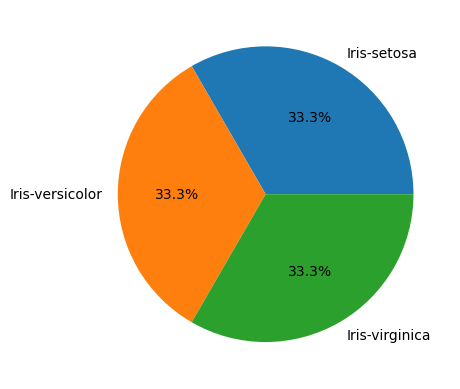

In [64]:
import matplotlib.pyplot as plt

plt.pie(counter, labels = DataFrame['species'].unique(),autopct = '%1.1f%%' )
plt.show()

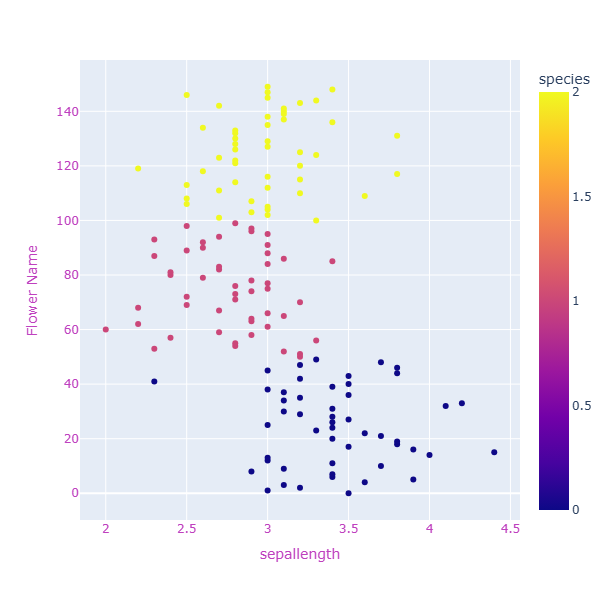

In [94]:
fig = px.scatter(data_frame= DataFrame, x='sepal_width',color='species')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepallength',color="#BF40BF"),
                 yaxis=dict(title="Flower Name",color="#BF40BF"))
fig.show()

# SPLIT DATA FOR TRAIN AND TEST

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
DataFrame['species'] = le.fit_transform(DataFrame['species'])
DataFrame['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [80]:
x = DataFrame.iloc[:,:-1]
y = DataFrame.iloc[:, -1]

In [82]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [84]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle  = True)

In [101]:
x_train.shape , y_train.shape

((105, 4), (105,))

# Model SVM

In [106]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

SVC = GridSearchCV(SVC(),param_grid, verbose = 1 )

In [110]:
SVC.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [116]:
SVC.best_params_

{'C': 1, 'gamma': 1}

In [120]:
y_pred = SVC.predict(x_test)

# Accuracy_Score

In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_pred, y_test)

0.9777777777777777

<Axes: >

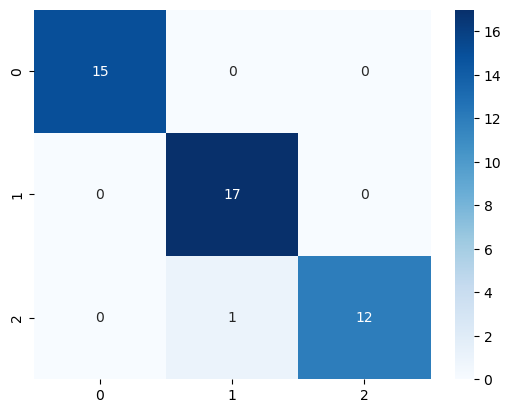

In [125]:
import seaborn as sns

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True, cmap='Blues')

In [137]:
DataFrame.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [139]:
prediction = SVC.predict([[5.1, 3.5, 1.4, 0.2]])

C:\Users\Loq\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [141]:
prediction

array([0])

In [133]:
decode_labels = le.inverse_transform(prediction)
decode_labels

array(['Iris-setosa'], dtype=object)

In [135]:
import pickle

with open('Iris_Model.pkl', 'wb') as file:
    pickle.dump(SVC, file)

In [143]:
# Load the model from the pickle file
with open('Iris_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)